In [209]:
import matplotlib.pyplot as plt
import numpy as np


def draw_port(i,total,axes):

    # 读取result.txt文件，提取端口1对应的流的信息
    with open('result.txt', encoding='UTF8') as f:
        lines = f.readlines()[1:]
        port1_flows = {line.strip().split(',')[0]:line.strip().split(',')[1:] for line in lines if line.split(',')[1] == str(i)}

    # 读取端口文件，获取端口1的带宽
    with open('port.txt',  encoding='UTF8') as f:
        f.readline()
        for line in f:
            if line.startswith(str(i)+','):
                port1_bandwidth = int(line.split(',')[1])
                break

    # 读取流文件，获取所有流的信息
    with open('flow.txt', encoding='UTF8') as f:
        f.readline()
        flows = {line.split(',')[0]: (int(line.split(',')[1]), int(line.split(',')[2]), int(line.split(',')[3])) for line in f}

    # 根据流的开始发送时间，在带宽变化折线图中画出对应的点
    length = 1300
    x = np.arange(length) # 带宽变化时间节点
    y = np.full(length,port1_bandwidth ) # 带宽变化值
    for flow_id in port1_flows.keys():
        start_time = int(port1_flows[flow_id][1])
        bandwidth = int(flows[flow_id][0])
        duration = int(flows[flow_id][2])
        for index in range(start_time,start_time+duration-1):
            y[index] = y[index]-bandwidth

    # 画出带宽变化折线图
    if i==7:
        global y1
        y1 = y
        
    axes[i].plot(x, y)
    axes[i].set_xlabel('time')
    axes[i].set_ylabel('bandwidth')
    axes[i].set_title('Bandwidth Change of Port '+str(i))
    
    if i==1:
        for flow_id in port1_flows.keys():
            port1_flows[flow_id][1] = int(port1_flows[flow_id][1])
           #duration
            port1_flows[flow_id].append(flows[flow_id][2])
            #带宽
            port1_flows[flow_id].append(flows[flow_id][0])
            #进入设备时间
            port1_flows[flow_id].append(flows[flow_id][1])
            
        global res 
        res = sorted(port1_flows.items(), key=lambda x: x[1])


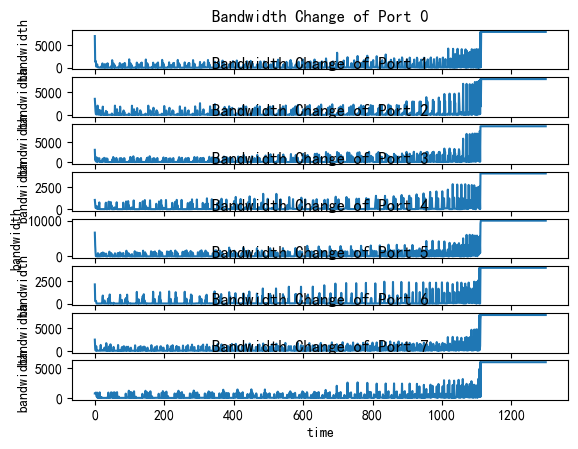

In [210]:

total = 8
fig, axes = plt.subplots(total, 1)
for i in range(total):
    draw_port(i,total,axes)
plt.show()

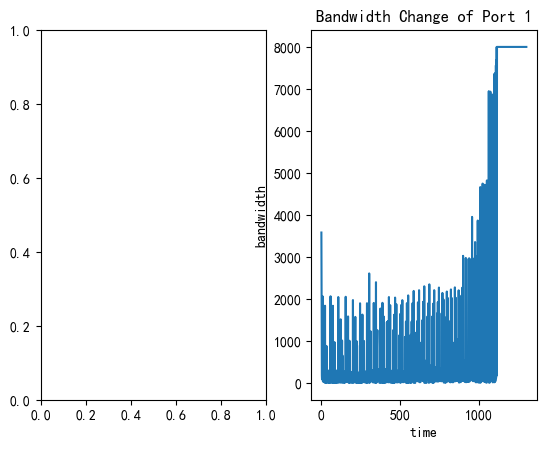

In [211]:
fig, axes = plt.subplots(1, 2)
draw_port(1,2,axes)
plt.show()

In [212]:
d = {i: x for i, x in enumerate(y1) if x < 0}
d

{}

In [178]:
res

[('1998', ['1', 0, 9, 808, 0]),
 ('1143', ['1', 0, 9, 987, 0]),
 ('4266', ['1', 0, 22, 822, 0]),
 ('2735', ['1', 0, 28, 289, 0]),
 ('2268', ['1', 0, 30, 143, 0]),
 ('3047', ['1', 0, 33, 850, 0]),
 ('3272', ['1', 0, 36, 228, 0]),
 ('3480', ['1', 0, 50, 292, 0]),
 ('3522', ['1', 1, 9, 106, 1]),
 ('1625', ['1', 1, 14, 684, 1]),
 ('612', ['1', 1, 16, 150, 1]),
 ('3543', ['1', 1, 22, 525, 1]),
 ('4898', ['1', 2, 7, 105, 2]),
 ('102', ['1', 2, 12, 503, 2]),
 ('4897', ['1', 2, 22, 377, 2]),
 ('4901', ['1', 2, 32, 323, 2]),
 ('1456', ['1', 3, 4, 123, 3]),
 ('2877', ['1', 3, 14, 57, 3]),
 ('2871', ['1', 3, 19, 81, 3]),
 ('3914', ['1', 3, 33, 186, 3]),
 ('3576', ['1', 3, 33, 189, 3]),
 ('1982', ['1', 4, 15, 87, 4]),
 ('4090', ['1', 6, 2, 17, 6]),
 ('561', ['1', 6, 4, 47, 6]),
 ('3033', ['1', 9, 50, 497, 9]),
 ('4198', ['1', 9, 50, 611, 9]),
 ('3959', ['1', 9, 50, 952, 9]),
 ('1138', ['1', 10, 2, 119, 8]),
 ('139', ['1', 11, 23, 26, 11]),
 ('2988', ['1', 14, 50, 229, 14]),
 ('4026', ['1', 15, 50,

In [171]:
with open('result.txt', encoding='UTF8') as f:
    lines = f.readlines()[1:]
    port1_flows =[line.strip().split(',') for line in lines]

sorted_lines = sorted(port1_flows,key=lambda p: int(p[0]))

with open('output.txt', 'w') as f_out:
    for line in sorted_lines:
        line_str = ','.join(line)
        f_out.write(line_str+'\n')

In [162]:
sorted_lines

['1', '1000']

In [173]:
# 流指定的端口不存在
for item in port1_flows:
    if int(item[1])<0 or int(item[1])>7:
        print(item)

In [184]:
# 进入设备时间 vs 开始发送时间
for item in res:
    if int(item[1][1])<int(item[1][4]):
        print(item)